In [259]:
import pandas as pd
import sklearn as sk
import json
import ast
import pickle
import math
import matplotlib.pyplot as plt

In [167]:
df = pd.read_json('/data/accessible_POIs/great-britain-latest.json')

In [168]:
df.loc[:,'id'] = df['Node'].apply(lambda x: dict(x)['id'])
df.loc[:,'access'] = df['Node'].apply(lambda x: dict(x)['tags'].get('access') if 'access' in dict(x)['tags'] else 'NONE')
df.loc[:,'barrier'] = df['Node'].apply(lambda x: dict(x)['tags'].get('barrier'))
df.loc[:,'bicycle'] = df['Node'].apply(lambda x: dict(x)['tags'].get('bicycle'))
df.loc[:,'motor_vehicle'] = df['Node'].apply(lambda x: dict(x)['tags'].get('motor_vehicle'))
df.loc[:,'opening_hours'] = df['Node'].apply(lambda x: dict(x)['tags'].get('opening_hours'))
df.loc[:,'wheelchair'] = df['Node'].apply(lambda x: dict(x)['tags'].get('wheelchair'))
df.loc[:,'amenity'] = df['Node'].apply(lambda x: dict(x)['tags'].get('amenity'))
df.loc[:,'lon'] = df['Node'].apply(lambda x: dict(x)['lonlat'][0])
df.loc[:,'lat'] = df['Node'].apply(lambda x: dict(x)['lonlat'][1])

df.drop(['Node','Way','Relation'], axis=1, inplace=True)
df

,id,access,barrier,bicycle,motor_vehicle,opening_hours,wheelchair,amenity,lon,lat
99878,99878,permissive,gate,no,no,dawn-dusk,yes,None,-0.152985,51.524358
104734,104734,NONE,None,None,None,None,yes,None,-1.785876,51.565653
106213,106213,NONE,None,None,None,None,yes,None,-0.142942,51.525660
108042,108042,NONE,None,None,None,Mo-We 16:00-23:30; Th-Fr 16:00-01:00; Sa 16:00...,limited,pub,-0.135513,51.523561
251191,251191,NONE,None,None,None,None,limited,None,-0.715918,51.115444
...,...,...,...,...,...,...,...,...,...,...
8495396114,8495396114,yes,None,None,None,None,yes,None,-2.997905,51.589057
8495396115,8495396115,yes,None,None,None,None,yes,None,-2.997255,51.589114
8497470120,8497470120,private,gate,private,private,None,limited,None,-0.135463,51.602958
8497671325,8497671325,NONE,gate,None,no,24/7,no,None,-4.336600,55.905952


In [170]:
df.to_pickle('/shared/accessible_pois.pkl')

In [147]:
from zipfile import ZipFile

In [171]:
with ZipFile('/data/All_POIs_by_country/pois_by_countries.zip', 'r') as z:
    z.extract('geojson/great-britain-latest.json', '/shared/great-britain-latest.json')
    #z.extract('geojson/great-britain-latest.geojson', '/shared/great-britain-latest.geojson')

In [177]:
with open('/shared/great-britain-latest.json','r') as j:
    data = json.load(j)

df = pd.json_normalize(data)
df

,type,name,features,crs.type,crs.properties.name
0,FeatureCollection,points,"[{'type': 'Feature', 'properties': {'osm_id': ...",name,urn:ogc:def:crs:OGC:1.3:CRS84


In [284]:
with open('/shared/great-britain-latest.json','r') as j:
    data = json.load(j)

df = pd.json_normalize(data['features'], max_level=3)
df

,type,properties.osm_id,properties.name,properties.other_tags,geometry.type,geometry.coordinates,properties.barrier,properties.highway,properties.ref,properties.place,properties.is_in,properties.man_made,properties.address
0,Feature,129,Vodafone,"""addr:city""=>""York"",""addr:housenumber""=>""29-30...",Point,"[-1.0815173, 53.9593574]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,99878,NaN,"""access""=>""permissive"",""bicycle""=>""no"",""motor_...",Point,"[-0.1529847, 51.524358]",gate,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,99884,NaN,"""amenity""=>""waste_basket""",Point,"[-0.1528165, 51.5243642]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,99918,NaN,"""emergency""=>""life_ring""",Point,"[-0.1577908, 51.5257182]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,99939,NaN,"""traffic_signals:direction""=>""forward""",Point,"[-0.1554618, 51.5224429]",NaN,traffic_signals,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168064,Feature,8498119736,NaN,"""power""=>""pole""",Point,"[-2.4567345, 52.0515355]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168065,Feature,8498119737,NaN,"""power""=>""pole""",Point,"[-2.4551184, 52.0527041]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168066,Feature,8498119738,NaN,"""power""=>""pole""",Point,"[-2.4538699, 52.0526208]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168067,Feature,8498119739,NaN,"""power""=>""pole""",Point,"[-2.4525234, 52.0522884]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
def extract_key(x,key):
    if type(x) == float:
        return None
    x_ = x.split(',')
    x_ = [y.replace('\'','').replace('"','') for y in x_]

    for k in x_:
        if key in k:
            return k[k.find('>')+1:]
    return None

df.loc[:,'shop'] = df['properties.other_tags'].apply(extract_key, args=('shop',))
df.loc[:,'amenity'] = df['properties.other_tags'].apply(extract_key, args=('amenity',))
df.loc[:,'wheelchair'] = df['properties.other_tags'].apply(extract_key, args=('wheelchair',))
df.loc[:,'barrier'] = df['properties.other_tags'].apply(extract_key, args=('barrier',))
df.loc[:,'access'] = df['properties.other_tags'].apply(extract_key, args=('access',))

In [286]:
df.loc[:,'lon'] = df['geometry.coordinates'].apply(lambda x: list(x)[0])
df.loc[:,'lat'] = df['geometry.coordinates'].apply(lambda x: list(x)[1])

In [287]:
df.to_csv('all_pois_wordcloud.csv')

In [292]:
len(df)
df = df[df['wheelchair'].isin(['yes','no','limited','designated'])]
#df.drop(['geometry.coordinates','type','geometry.type'], axis=1, inplace=True)
df.to_csv('accessible_pois_wordcloud.csv')

29341

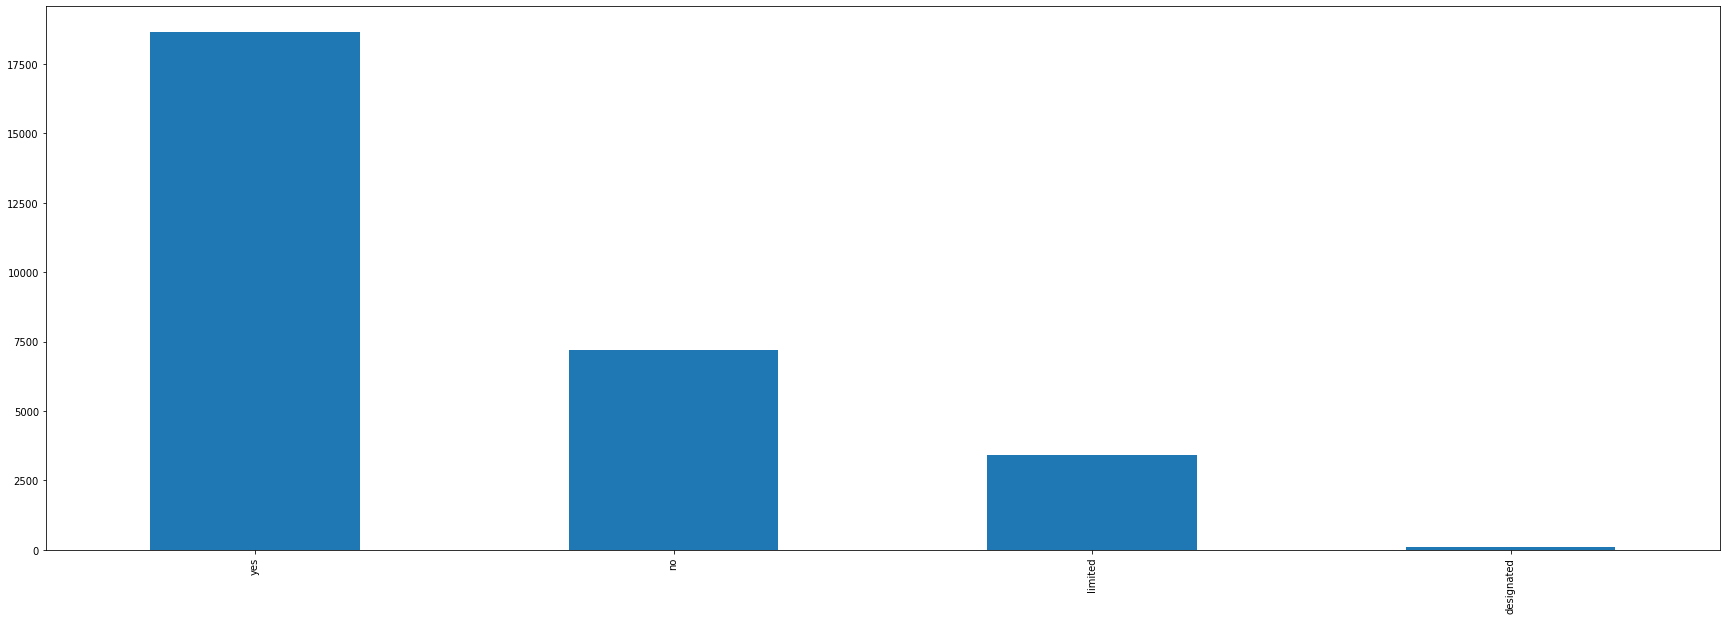

In [293]:
set(df['wheelchair'])
plt.figure(figsize=(30,10))
df['wheelchair'].value_counts().plot(kind='bar')
len(df)

,type,properties.osm_id,properties.name,properties.other_tags,geometry.type,geometry.coordinates,properties.barrier,properties.highway,properties.ref,properties.place,properties.is_in,properties.man_made,properties.address,shop,amenity,wheelchair,barrier,access,lon,lat
0,Feature,129,Vodafone,"""addr:city""=>""York"",""addr:housenumber""=>""29-30...",Point,"[-1.0815173, 53.9593574]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile_phone,None,None,None,None,-1.081517,53.959357
1,Feature,99878,NaN,"""access""=>""permissive"",""bicycle""=>""no"",""motor_...",Point,"[-0.1529847, 51.524358]",gate,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,permissive,-0.152985,51.524358
2,Feature,99884,NaN,"""amenity""=>""waste_basket""",Point,"[-0.1528165, 51.5243642]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,waste_basket,None,None,None,-0.152816,51.524364
3,Feature,99918,NaN,"""emergency""=>""life_ring""",Point,"[-0.1577908, 51.5257182]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-0.157791,51.525718
4,Feature,99939,NaN,"""traffic_signals:direction""=>""forward""",Point,"[-0.1554618, 51.5224429]",NaN,traffic_signals,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-0.155462,51.522443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168064,Feature,8498119736,NaN,"""power""=>""pole""",Point,"[-2.4567345, 52.0515355]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-2.456735,52.051535
4168065,Feature,8498119737,NaN,"""power""=>""pole""",Point,"[-2.4551184, 52.0527041]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-2.455118,52.052704
4168066,Feature,8498119738,NaN,"""power""=>""pole""",Point,"[-2.4538699, 52.0526208]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-2.453870,52.052621
4168067,Feature,8498119739,NaN,"""power""=>""pole""",Point,"[-2.4525234, 52.0522884]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,-2.452523,52.052288


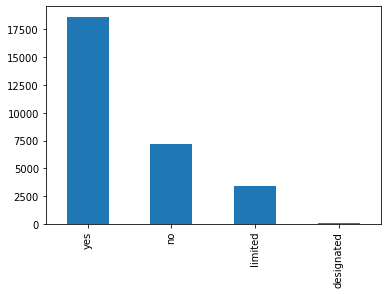

In [291]:
_ = df
_['wheelchair'].value_counts().plot(kind='bar')
_

In [282]:
df['properties.other_tags'].to_csv('wordcloud.csv')

In [283]:
df

,type,properties.osm_id,properties.name,properties.other_tags,geometry.type,properties.barrier,properties.highway,properties.ref,properties.place,properties.is_in,properties.man_made,properties.address,shop,amenity,wheelchair,barrier,access,lon,lat
1,Feature,99878,NaN,"""access""=>""permissive"",""bicycle""=>""no"",""motor_...",Point,gate,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,permissive,-0.152985,51.524358
41,Feature,104734,Swindon,"""network""=>""National Rail"",""railway""=>""station...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,None,-1.785876,51.565653
52,Feature,106213,NaN,"""crossing""=>""unmarked"",""wheelchair""=>""yes"",""tr...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,None,-0.142942,51.525660
121,Feature,108042,Simmons,"""addr:housenumber""=>""31"",""addr:postcode""=>""WC1...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,pub,no,None,customers,-0.135513,51.523561
1443,Feature,251191,Gibbet Hill,"""tourism""=>""viewpoint"",""wheelchair""=>""limited""...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,limited,None,None,-0.715918,51.115444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166583,Feature,8495396114,Courtyard (Cambrian Rd side),"""access""=>""yes"",""addr:city""=>""Newport"",""addr:h...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,yes,-2.997905,51.589057
4166584,Feature,8495396115,Courtyard (High St end),"""access""=>""yes"",""addr:city""=>""Newport"",""addr:h...",Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,yes,None,yes,-2.997255,51.589114
4167382,Feature,8497470120,NaN,"""access""=>""private"",""bicycle""=>""private"",""foot...",Point,gate,NaN,NaN,NaN,NaN,NaN,NaN,None,None,limited,None,private,-0.135463,51.602958
4167479,Feature,8497671325,NaN,"""foot""=>""yes"",""motor_vehicle""=>""no"",""opening_h...",Point,gate,NaN,NaN,NaN,NaN,NaN,NaN,None,None,no,None,None,-4.336600,55.905952
